# Ejercicio 1 - Algebra Lineal

## Instrucciones: En una libreta de Jupyter, calcula la SVD de la matriz A = [[1, 2], [2, 3]]. Grafica el efecto sobre el conjunto de los vectores en R2 de longitud 1 (el círculo de centro [0, 0] y radio 1) al aplicarle VT luego Σ y luego U. Compara el efecto de aplicarle al círculo directamente A.


### Se cargan libretas para el análisis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definimos matriz inicial. En este caso A.

In [3]:
A = [[1,2],[2,3]]

In [4]:
print(A)

[[1, 2], [2, 3]]


### Con la ayuda de Numpy y la función linalg.svd hacemos la descomposición en valores singulares de la matriz A.

In [5]:
u, s, v = np.linalg.svd(A)

In [6]:
print(u,s,v)

[[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]] [4.23606798 0.23606798] [[-0.52573111 -0.85065081]
 [ 0.85065081 -0.52573111]]


### Los valores singulares nos indican:

### u = matriz unitaria ortogonal

### s = vectores singulares

### v = matriz unitaria ortogonal v transpuesta

### Sabemos por lo que hemos visto en clase que se debe de cumplir con la siguiente igualdad:

A = U Σ VT

### Utilizamos la función de producto punto (dot) de Numpy, le asignamos estos valores a la matriz

B

In [9]:
B = np.dot(u, np.dot(np.diag(s), v))

### Imprimimos las matrices A y B para comprobar que son iguales

In [10]:
print(A,B)

[[1, 2], [2, 3]] [[1. 2.]
 [2. 3.]]


### Graficamos un círculo con los vectores de longitud 1 partiendo de [0,0]

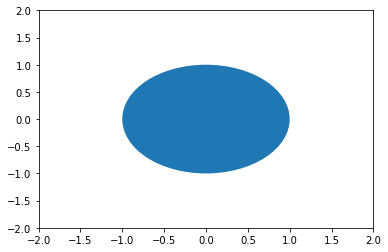

In [14]:
fig, ax = plt.subplots()

ax.set(xlim=(-2, 2), ylim = (-2, 2))

a_circle = plt.Circle((0, 0), 1)

ax.add_artist(a_circle)

### Esta gráfica nos sirve para ver el círculo, pero necesitamos crear los vectores unitarios.

#### Definimos Radio con valor de 1

In [15]:
r = 1.0

#### Definimos el valor de tetha que será de una circunferencia (2¶)

In [17]:
theta = np.linspace(0, 2*np.pi, 100)

#### Calculamos x1 y y1, los valores de los vectores

In [18]:
x1 = r*np.cos(theta)
y1 = r*np.sin(theta)

#### Finalmente calculamos los vectores unitarios

In [19]:
vectoru = np.vstack((x1, y1)).T

### Volvemos a graficar el círculo de vectores unitarios con origen en [0,0]

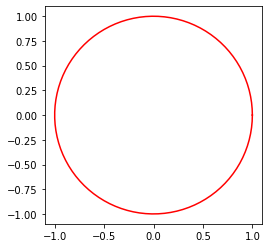

In [75]:
fig, ax = plt.subplots(1)
ax.plot(x1, y1, c='r')
ax.set_aspect(1)
plt.show()

### Al vector unitario le aplicamos VT, después Σ y finalmente U. Este valor lo asignamos al objeto a.

In [32]:
a = np.dot(u, np.dot(np.diag(s), np.dot(v, vectoru[1])))
print(a)

[1.12483452 2.18624511]


#### Comprobaremos que a es igual a aplicarle directamente la matriz A al vector unitario. A esto le asignaremos el objeto a1.


In [34]:
a1 = np.dot(A,vectoru[1])
print(a1)

[1.12483452 2.18624511]


### Vamos a graficar estas dos transformaciones

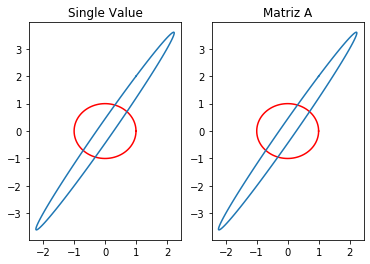

In [79]:
vectorn = np.matrix([x1,y1]).T

a = np.dot(u,np.dot(np.diag(s),np.dot(v,vectorn.T))).T

a1 = np.dot(A,vectorn.T).T

fig, ax = plt.subplots(1,2)
ax[0].set_title("Single Value")
ax[1].set_title("Matriz A")

ax[0].plot(vectorn[:,0],vectorn[:,1],c='r')
ax[1].plot(vectorn[:,0],vectorn[:,1],c='r')

ax[0].plot(a[:,0],a[:,1])

ax[1].plot(a1[:,0],a1[:,1])

plt.show()

Podemos ver que ambas son la misma figura, es decir es el mismo efecto en abmos casos

### Calcula la matriz de rango k mejor se aproxime a A

#### ¿Cuál es la formula?

#### $$A_k := \sigma_1 u_1 v_1^T + ... + \sigma_k u_k v_k^T$$

#### Definimos valores

In [70]:
u0 = u[0]
v0 = v[0]
s0 = s[0]

In [71]:
matriz = u0 * v0 * s0

In [72]:
print(matriz)

[1.17082039 3.06524758]


#### Graficamos

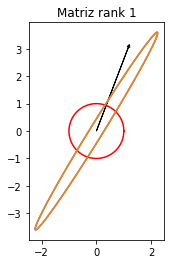

In [77]:
fig, ax = plt.subplots(1)

ax.set_title("Matriz rank 1")

ax.plot(vectorn[:,0],vectorn[:,1],c='r')

ax.plot(a[:,0],a[:,1])

ax.plot(a1[:,0],a1[:,1])

ax.arrow(0, 0, matriz[0], matriz[1], head_width=0.1, head_length=0.1)

ax.set_aspect(1)

plt.show()